# Day 1

## Step 1: Importing the libraries

In [3]:
import numpy as np
import pandas as pd

## Step 2: Importing dataset

In [6]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [8]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,3].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Step 3: Handling the missing data

In [12]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Step 4: Encoding categorical data

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencode_X = LabelEncoder() 
X[:,0] = labelencode_X.fit_transform(X[:,0])
X[:,0]

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0], dtype=object)

### Creating a dummy variable

In [22]:
#categorical_features是需要编码的列索引
onehotencoder = OneHotEncoder(categorical_features= [0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
X

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.40000000e+01, 7.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 2.70000000e+01, 4.80000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 3.00000000e+01, 5.40000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 3.80000000e+01, 6.10000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 4.00000000e+01, 6.37777778e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.50000000e+01, 5.80000000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 3.87777778e+01, 5.

## Step 5: Splitting the datasets into training sets and Test sets

In [26]:
#test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量,random_state：是随机数的种子
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

## Step 6: Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
X_train

array([[ 1.        , -1.        ,  1.        , -1.        ,  2.64575131,
        -0.77459667,  0.26306757,  0.12381479],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667, -0.25350148,  0.46175632],
       [ 1.        , -1.        ,  1.        , -1.        , -0.37796447,
         1.29099445, -1.97539832, -1.53093341],
       [ 1.        , -1.        ,  1.        , -1.        , -0.37796447,
         1.29099445,  0.05261351, -1.11141978],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667,  1.64058505,  1.7202972 ],
       [ 1.        , -1.        ,  1.        , -1.        , -0.37796447,
         1.29099445, -0.0813118 , -0.16751412],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667,  0.95182631,  0.98614835],
       [-1.        ,  1.        , -1.        ,  1.        , -0.37796447,
        -0.77459667, -0.59788085, -0.48214934]])

# Day 2 简单线性回归

##  Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/studentscores.csv')
X = dataset.iloc[:,:1].values
Y = dataset.iloc[:,1].values

from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/4,random_state = 0)
X_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

## Step 2: Fitting Simple Linear Regression Model to the training set

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train,Y_train)

## Step 3: Predecting the Result

In [5]:
Y_pred = regressor.predict(X_test)

## Step 4: Visualization

### Visualising the Training results

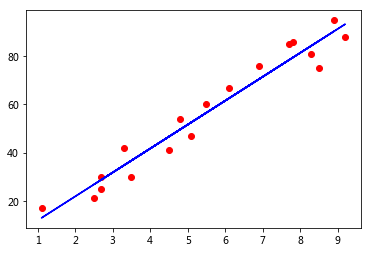

In [6]:
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'b')

### Visualizing the test results

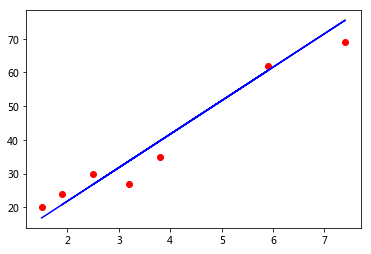

In [7]:
plt.scatter(X_test,Y_test,color = 'r')
plt.plot(X_test,Y_pred,color = 'b')

# Day 3 多元线性回归

## Step 1: Data Preprocessing

### Importing the libraries

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

### Importing the dataset

In [86]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

### Encoding Categorical data

In [87]:
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder(categorical_features=[3])
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X = onehotencoder.fit_transform(X).toarray()

### Avoiding Dummy Variable Trap

In [88]:
X = X[: , 1:]

### Splitting the dataset into the Training set and Test set

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

## Step 2: Fitting Multiple Linear Regression to the Training set

In [90]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step 3: Predicting the Test set results

In [91]:
# y_pred = regressor.predict(X_test)
regressor.score(X_test,Y_test)

0.9347068473282446

# Day 4 逻辑回归

## 什么是逻辑回归

#### 逻辑回归用来处理不同的分类问题，它的目的是预测当前的对象属于哪个组，它会给出一个离散的二进制数出的结果。


## 如何工作

#### 逻辑回归使用基础逻辑函数通过估算概率来测量因变量(我们想要预测的标签)和一个或者多个自变量之间的关系。

## Sigmoid函数

#### Sigmoid函数是一个S形曲线，可以实现将任意真实值映射为值域为0-1的值，但从来不局限于这些值。

<img src="image/sigmoid.png" />

## 做出预测

#### 这些概率值必须转换为二进制数，以便实际中进行预测。这是逻辑函数的任务，也被称为sigmoid函数。然后使用阈值分类器将(0,1)范围的值转化为0和1的值来表示结果

## 逻辑回归 VS 线性回归

#### 逻辑回归给出离散的数出结果，然后线性回归给出连续的数出结果。

# Day 5 

# Day 6 逻辑回归的实现

## The DataSet | Social Network

<img src='image/data.PNG'>

此数据集包含社交网络中用户的信息。这些信息是用户ID，性别，年龄和估计工资。一家汽车公司刚刚推出了他们全新的豪华SUV。我们试图看看社交网络中的哪些用户将购买这款全新的SUV。这里的最后一栏是或否用户购买了这款SUV，我们将构建一个预测模型如果用户打算根据两个变量来购买SUV，这两个变量将是年龄和估计的工资。所以我们的特征矩阵只是这两列。我们希望找到年龄与用户的估计工资之间的一些相关性以及他购买是或否购买SUV的决定。

## Step 1 | Data Pre-Processing

### Importing the Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Importing the dataset

In [75]:
dataset = pd.read_csv('/home/jakey/github/100-Days-Of-ML-Code/datasets/Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:,-1].values

### Splitting the dataset into the Training set and Test set

In [76]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train.astype(float))
x_test = sc.fit_transform(X_test.astype(float))

## Step 2 | Logistic Regression Model

这个工作的库被称为线性模型的库，是因为逻辑回归是一个线性分类器，在这里我拥有两个纬度，所以我们的两类用户被一条直线分开。

### Fitting Logistic Regression to the Training set

In [80]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Step 3 | Predection

### Predicting the Test set results

In [81]:
y_pred = classifier.predict(x_test)

## Step 4 | Evaluating The Predection

我们预测了测试结果，现在我们将评估我们的逻辑回归模型是否正确学习和理解。所以这个混淆矩阵将包含我们的模型在集合上做出的正确预测以及不正确的预测。

### Making the Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

### Visualization

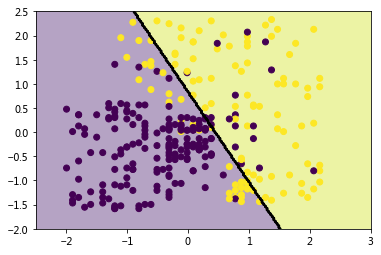

In [83]:
X,Y = np.mgrid[-2.5:3:200j,-2:2.5:200j]
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

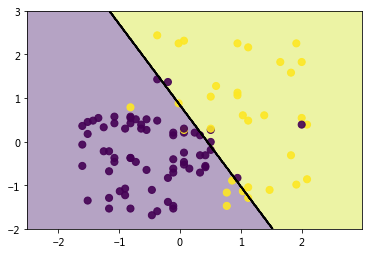

In [84]:
X, Y = np.meshgrid(np.arange(-2.5,3,0.01),np.arange(-2,3,0.01))
# X,Y = np.mgrid[-2.5:3:200j,-2:3:200j]
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.figure()
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'],linestyles=['-'])
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=50,alpha=0.9)